In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("datas/rl_gc.csv")

In [3]:
df.head()

,Read_length,GC_count,FF
0,11.210215,111.232844,19.052706
1,11.206084,111.340903,17.772070
2,11.189647,111.400369,16.200000
3,11.192131,111.153783,14.987733
4,11.196457,111.273290,17.656184


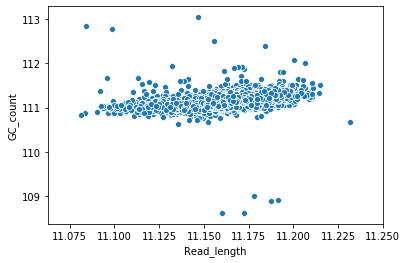

In [4]:
sns.scatterplot(df.Read_length, df.GC_count)

In [ ]:
sns.distplot(df.GC_count)

In [ ]:
df.head()

In [ ]:
df[df.GC_count>112]

In [ ]:
# Since the above data is meaning less for our Analysis so we drop these data

In [ ]:
print("Size before data edit", df.shape)
df = df[df.GC_count<=112] # less than 112 Only
print("Size after removing data",df.shape)

In [ ]:
df[df.Read_length<11.09]

In [ ]:
df = df[df.Read_length>11.09]

In [ ]:
df[df.FF>30]

In [ ]:
df = df[df.FF<30]

In [ ]:
df.shape

#### Apply Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error , accuracy_score

In [ ]:
# Hide all warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.head()

In [ ]:
x = df.loc[:,["Read_length" , "GC_count"]]
y = df.loc[:, ["FF"]]

In [ ]:
y.head()

In [ ]:
# default x_train and x_test
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2)
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

In [ ]:
# We will create a function so we can later edit these values directly

def split(test_size = 0.1,random_state =10 ):
    global x_train, x_test, y_train,y_test , x, y
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 10)
    print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression().fit(x_train, y_train)
lr_pred = lr.predict(x_test)

In [ ]:
print("Score for Prediction data Set",lr.score(x_test,y_test))
print("Score for Original data " , lr.score(x_train, y_train))
# We can  see little bit more good in training
# but it is not good to make decision

In [ ]:
lr_pred[:10]

In [ ]:
y_test.head(10)

In [ ]:
plt.plot(y_test, lr.predict(x_test), color = "green")
plt.show()

##### Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
print(x_train_poly.shape , x_test_poly.shape)
# y Parameters Columns are increasing

In [ ]:
x_train_poly

#### kfold

In [ ]:
import lightgbm as lgbm
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn import preprocessing

In [ ]:
kfold = KFold(n_splits=5, random_state = 2020, shuffle = True)
temp_score = 0
#for _ in range(2,100):
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=50,
                                  learning_rate=1, n_estimators=720,
                                  max_bin = 96, bagging_fraction = 0.8,
                                  bagging_freq = 5, feature_fraction = 0.2319,
                                  feature_fraction_seed=9, bagging_seed=9,
                                  min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(x, y)
score = r2_score(model_lgb.predict(x), y)
    
if score > temp_score:
    temp_score = score
    print(score, _)

In [ ]:
model_lgb.predict(x_test)[:10]

In [ ]:
y_test[:10]

### Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
SGD = SGDRegressor(max_iter=100).fit(x,y)
r2_score(SGD.predict(x),y)

#### Lasso 

In [ ]:
from sklearn.linear_model import ElasticNet  , Lasso , BayesianRidge , LassoLarsIC
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import RobustScaler


In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.00, random_state=10))
lasso.fit(x, y)
r2_score(lasso.predict(x), y)

#### Kernel Ridge Regression

In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [ ]:
#Polynomial is time consuming
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(x, y)
r2_score(KRR.predict(x), y)

#### BayesianRidge

#### XGB boost

In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(x, y)
r2_score(model_xgb.predict(x), y)

##### Catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cb_model = CatBoostRegressor(iterations = 500,
                            learning_rate = 0.05,
                            depth = 10,
                            random_seed = 42,
                            bagging_temperature = 0.2,
                            od_type = "Iter",
                            metric_period = 50,
                            od_wait = 20)

#### Deep Learning

In [ ]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

In [ ]:
df.isna().sum()